# TP6 : Reconnaissance d'image par un réseau de neurones

### Chargement des librairies

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Chargement des données

In [2]:
# Lecture des données
DIAGONAL=pd.read_csv("deuxdiag.csv")
# Visualisation des 5 premières données
DIAGONAL.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,0,0,0,1,1,1,1,1,1,0
1,0,0,1,0,0,1,0,0,0,0
2,1,0,0,1,0,1,1,1,0,0
3,1,1,0,1,1,1,0,0,1,1
4,1,0,0,1,1,1,0,1,1,1


**Exercice**
1. Dans le jeu de données `DIAGONAL`, à quoi correspond une donnée ?
2. On considère les données `X1`, ..., `X9` comme les 9 cases d'un carré 3*3 :<br/>
    X1 X2 X3<br/>
    X4 X5 X6<br/>
    X7 X8 X9<br/>
    À quelle condition sur les `Xi` a-t-on : une des deux diagonales du carré est constituée de 1 ?
3. Vérifier sur les 5 premières données que le jeux de données `DIAGONAL` est tel que la conditon précédente est vérifiée si et seulement si `Y=1`.

*Réponses*


### Données d'apprentissage et données de validation

Le jeu de données est séparé 2 :
- Deux tiers des données sont utilisées pour l'apprentissage du réseau de neurones
- Le troisième tiers des données est mis à l'écart et sera utilisé pour évaluer la performance du réseau sur ces données (sur lesquelles il n'aura pas appris).

In [12]:
N=len(DIAGONAL) # Nombre de données
n=int(2*N/3) # Deux tiers du nombres de données 
X=DIAGONAL.drop(['Y'],axis=1)[0:n] # Données d'apprentissage X
Y=DIAGONAL['Y'][0:n] # Données d'apprentissage Y
X.insert(loc = 0, column = 'X0',value = np.ones(n,dtype = int)) # On ajoute une colonne de 1 pour b
Xvalid=DIAGONAL.drop(['Y'],axis=1)[n+1:N] # Données de validation X
Yvalid=DIAGONAL['Y'][n+1:N] # Données de validation Y
nvalid=len(Xvalid)
Xvalid.insert(loc = 0, column = 'X0',value = np.ones(nvalid,dtype=int)) # On ajoute une colonne de 1 pour b

**Exercice**

Sachant que `DIAGONAL` contient 300 données $(X_i,Y_i)$, sur combien de données le réseau va-t-il apprendre ? Sur combien de données la performance du réseau va-t-elle être évaluée ?

*Réponses*


### Réseau à 1 couche cachée de 2 neurones
On approxime $X\mapsto Y$ par la fonction $R_{\mathcal{W}}$, où $\mathcal{W}$ désigne l'ensemble des paramètres $b$, $w_1$, $w_2$, $B=\begin{pmatrix}b_1\\b_2\end{pmatrix}$ et $W=\begin{pmatrix}W_1\\W_2\end{pmatrix}=\begin{pmatrix}w_{11}&w_{12}&\ldots&w_{19}\\w_{21}&w_{22}&\ldots&w_{29}\end{pmatrix}$, définie par : $$R_{\mathcal{W}}:X\mapsto \sigma\left(b+\begin{pmatrix}w_1&w_2\end{pmatrix}\cdot H(B+W\cdot X)\right),$$ où
$$\sigma(x)=\frac{1}{1+e^{-x}}$$ est la fonction sigmoïd, et $$H=\begin{pmatrix}h_1(X)\\h_2(X)\end{pmatrix}=\begin{pmatrix}\sigma\left(b_1+\begin{pmatrix}w_{11}&\ldots&w_{19}\end{pmatrix}\cdot X\right)\\\sigma\left(b_2+\begin{pmatrix}w_{21}&\ldots&w_{29}\end{pmatrix}\cdot X\right)\end{pmatrix}$$ est la couche cachée.

**Exercice**

1. Combien de paramètres la fonction $R_{\mathcal{W}}$ possède-t-elle ?
2. Représenter le réseau de neurones associé à $R_{\mathcal{W}}$.
3. Pourquoi parle-t-on d'un réseau à *deux* neurones ?

*Réponses*


### Rétropropagation du gradient

Les paramètres $\mathcal{W}$ sont déterminés en minimisant la fonction :
$$f(\mathcal{W})=\frac{1}{2}\sum\limits_{j} (R_{\mathcal{W}}(X_j)-Y_j)^2$$
où la somme est calculée sur les données d'apprentissage.

On réécrit $$f(\mathcal{W})=\frac{1}{2}\sum\limits_{j} (\sigma(s_j)-Y_j)^2$$
où $$s_j=b+W\cdot H_j,$$
avec $$H_j=\begin{pmatrix}\sigma(h_{1j})\\ \sigma(h_{2j})\end{pmatrix}$$
où $$h_{ij}=b_i+W_i\cdot X_j.$$

**Exercice**

On rappelle la propriété $\sigma'(x)=\sigma(x)\times (1-\sigma(x))$.

1. À partir de $$f(\mathcal{W})=\frac{1}{2}\sum\limits_{j} (\sigma(\underbrace{b+W\cdot H_j}_{s_j})-Y_j)^2$$ établir les dérivées suivantes :
    - $\frac{\partial f(\mathcal{W})}{\partial b}=\sum\limits_{j} (\sigma(s_j)-Y_j)\sigma(s_j)(1-\sigma(s_j))\times1$
    - $\frac{\partial f(\mathcal{W})}{\partial w_i}=\sum\limits_{j} (\sigma(s_j)-Y_j)\sigma(s_j)(1-\sigma(s_j))\sigma(h_{ij})$

2. À partir de $$f(\mathcal{W})=\frac{1}{2}\sum\limits_{j} (\sigma(\underbrace{b+w_1\sigma(\underbrace{b_1+\sum\limits_{k=1..9} w_{1k}x_{kj}}_{h_{1j}})+w_2\sigma(\underbrace{b_2+\sum\limits_{k=1..9} w_{2k}x_{kj}}_{h_{2j}})}_{s_j})-Y_j)^2$$ établir les dérivées suivantes :
    - $\frac{\partial f(\mathcal{W})}{\partial b_i}=\sum\limits_{j} (\sigma(s_j)-Y_j)\sigma(s_j)(1-\sigma(s_j)w_i\sigma(h_{ij})(1-\sigma(h_{ij}))\times 1$
    - $\frac{\partial f(\mathcal{W})}{\partial w_{ik}}=\sum\limits_{j} (\sigma(s_j)-Y_j)\sigma(s_j)(1-\sigma(s_j))w_i\sigma(h_{ij})(1-\sigma(h_{ij}))x_{kj}$

*Réponses*

Sur papier...

In [164]:
# Fonction sigmoïde
def sigma(x):
    return 1/(1+np.exp(-x))

# Calcul du gradient
def gradient(W): #W=[[b,w1,w2],[b1,w11,w12,...,w19],[b2,w21,...,w29]]
    H1=[sigma(np.dot(W[1],X.iloc[j])) for j in range(n)] # liste des sigma(h1j)
    H2=[sigma(np.dot(W[2],X.iloc[j])) for j in range(n)] # liste des sigma(h2j)
    S=[sigma(W[0][0]+W[0][1]*H1[j]+W[0][2]*H2[j]) for j in range(n)] # liste des sigma(sj)
    # Dérivées partielles :
    db=np.sum([(S[j]-Y.iloc[j])*S[j]*(1-S[j]) for j in range(n)])
    dw1=np.sum([(S[j]-Y.iloc[j])*S[j]*(1-S[j])*H1[j] for j in range(n)])
    dw2=np.sum([(S[j]-Y.iloc[j])*S[j]*(1-S[j])*H2[j] for j in range(n)])
    db1=np.sum([(S[j]-Y.iloc[j])*S[j]*(1-S[j])*H1[j]*(1-H1[j]) for j in range(n)])
    db2=np.sum([(S[j]-Y.iloc[j])*S[j]*(1-S[j])*H2[j]*(1-H2[j]) for j in range(n)])
    dW1=[0,0,0,0,0,0,0,0,0]
    dW2=[0,0,0,0,0,0,0,0,0]
    for k in range(9):
        dW1[k]=np.sum([(S[j]-Y.iloc[j])*S[j]*(1-S[j])*H1[j]*(1-H1[j])*X.iloc[j][k] for j in range(n)])
        dW2[k]=np.sum([(S[j]-Y.iloc[j])*S[j]*(1-S[j])*H2[j]*(1-H2[j])*X.iloc[j][k] for j in range(n)])
    return [[db,dw1,dw2],[db1]+dW1,[db2]+dW2]

***Exercice***

1. Calculer (dans la cellule ci-dessous) le gradient de $f$ pour des paramètres tous nuls : $\mathcal{W}_0=(0,\ldots,0)$.
2. En déduire les coordonnées du point $\mathcal{W}_1$ après une première itération de la descente de gradient pour un pas de $\tau=10$.
3. Calculer le gradient en $\mathcal{W}_1$. Que remarquez vous ? Comment l'expliquer ?
4. Est-ce judicieux de partir de $\mathcal{W}_0$ ?

In [ ]:
#Calculs :

*Réponses*



In [165]:
# Algorithme de descente
def descente(W,tau=1,tolerance=1e-3,Nbiterations=10):
    for i in range(Nbiterations):
        g = gradient(W)
        normg = g[0][0]**2+g[0][1]**2+g[0][2]**2
        +np.sum([g[1][k]**2 for k in range(10)])
        +np.sum([g[2][k]**2 for k in range(10)])
        print(normg) # On affiche la norme du gradient pour visualiser la descente
        if normg< tolerance:
            print('L\'algorithme a convergé.\n Solution atteinte:\n W=',W,'\n Norme du gradient:',normg)
            return W
        W[0][0]=W[0][0]-tau*g[0][0]
        W[0][1]=W[0][1]-tau*g[0][1]
        W[0][2]=W[0][2]-tau*g[0][2]
        for j in range(10):
            W[1][j]=W[1][j]-tau*g[1][j]
            W[2][j]=W[2][j]-tau*g[2][j]
    print('L\'algorithme n\'a pas convergé.\n Solution atteinte:\n W=',W,'\n Norme du gradient:',normg)
    return W

***Exercice***

Identifier la monotonie de l'algorithme sur les 10 premières itération, à partir de 

`W=[[1,2,3],[4,5,6,7,8,9,10,11,12,13],[13,12,11,10,9,8,7,6,5,4]]`

pour un pas de :

$\tau=1$, $\tau=10$

In [167]:
W=[[0,0,0],[1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1]]
descente(W,tau=1e-16,tolerance=1e-6,Nbiterations=10)

187.04341999187955
187.04341999187875
187.0434199918783
187.04341999187747
187.04341999187676
187.04341999187614
187.04341999187537
187.0434199918747
187.0434199918741
187.04341999187326
L'algorithme n'a pas convergé.
 Solution atteinte:
 W= [[-7.999999999999934e-15, -7.843577627329173e-15, -7.843577627329173e-15], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]] 
 Norme du gradient: 187.04341999187326


[[-7.999999999999934e-15, -7.843577627329173e-15, -7.843577627329173e-15],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]

In [108]:
def prediction(W,X):
    return sigma(W[0][0]+W[0][1]*sigma(np.dot(W[1],X))+W[0][1]*sigma(np.dot(W[2],X)))

In [118]:
print('Nombre d\'erreurs sur les données de validation :',np.sum(\
             [np.abs(round(prediction(W,Xvalid.iloc[i]))-Yvalid.iloc[i])\
              for i in range(len(Xvalid)-1)]))

Nombre d'erreurs sur les données de validation : 11.0


**Exercice**

On considère les paramètres :

`W= [[9.88490731988063, -21.978512228107505, -17.916264438553515], [16.24386006076292, -3.3023394159857937, 0.24495692674969732, -7.396212617646716, -3.593451718087197, -11.160218572484126, 3.377878093346306, -0.18551085358790684, 3.6581958544686723, -7.063699791645382], [7.070278747774737, -5.443080663419691, -3.495868955617516, -0.4833459413778877, 0.640016023480778, -0.4530535245792459, -2.5643255163830485, -4.5732183345557385, -5.341507777305012, 0.4114649638794456]]`
    
Calculer la sortie du réseau de neurones pour une valeur $X$ possèdant une diagonale de $1$ et pour une valeur de $X$ ne possédant pas une diagonale de $1$.

In [103]:
from sklearn.neural_network import MLPClassifier
algo = MLPClassifier(\
    activation='logistic',\
    solver='lbfgs',\
    shuffle=True,\
    hidden_layer_sizes=(2,),\
    max_iter=100000,\
    tol=1e-5)
algo.fit(X.drop(['X0'],axis=1),Y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100000,
              solver='lbfgs', tol=1e-05)

In [88]:
print('[b1,b2],[b] :\n ',algo.intercepts_,\
      '\n[[w11,w21],[w12,w22]],[w1,w2] :\n ',algo.coefs_,\
      '\nScore : ',algo.score(X.drop(['X0'],axis=1),Y))

[b1,b2],[b] :
  [array([16.42025076,  5.20972733]), array([9.92372778])] 
[[w11,w21],[w12,w22]],[w1,w2] :
  [array([[ -0.5920726 ,  -9.17818546],
       [ -0.46783119,  -0.89718582],
       [ -5.21312016,  -3.90961843],
       [ -2.23348712,   0.94438838],
       [-10.91563272,  -0.1549015 ],
       [  0.86375386,  -0.40899946],
       [ -1.89036384,  -3.215415  ],
       [  1.56834536,  -2.29057482],
       [ -7.04240137,   2.11995034]]), array([[-20.83355396],
       [-18.42182879]])] 
Score :  1.0


In [104]:
W=[[algo.intercepts_[1][0]]+[algo.coefs_[1][0][0]]+[algo.coefs_[1][1][0]],\
[algo.intercepts_[0][0]]+[algo.coefs_[0][k][0] for k in range(9)],\
[algo.intercepts_[0][1]]+[algo.coefs_[0][k][1] for k in range(9)]]

In [219]:
print('Nb d\'erreurs :',np.sum(\
             [np.abs(algo.predict([Xvalid.iloc[i]])-Yvalid.iloc[i])\
              for i in range(len(Xvalid))]))
for i in range(len(Xvalid)):
    print('[',[Xvalid.iloc[i][k] for k in range(d)],']',\
          '->',algo.predict([Xvalid.iloc[i]]),\
          '... on aimerait :',Yvalid.iloc[i])

Nb d'erreurs : 4
[ [0, 1, 0, 1, 0, 1, 0, 1, 0] ] -> [0] ... on aimerait : 0
[ [0, 0, 1, 1, 1, 1, 0, 0, 0] ] -> [0] ... on aimerait : 0
[ [0, 0, 0, 0, 0, 1, 0, 0, 1] ] -> [0] ... on aimerait : 0
[ [0, 0, 1, 1, 1, 1, 0, 0, 1] ] -> [0] ... on aimerait : 0
[ [0, 0, 1, 0, 1, 0, 1, 1, 0] ] -> [0] ... on aimerait : 1
[ [0, 1, 1, 0, 0, 0, 1, 0, 0] ] -> [0] ... on aimerait : 0
[ [0, 0, 0, 1, 1, 1, 1, 0, 1] ] -> [0] ... on aimerait : 0
[ [0, 1, 0, 0, 0, 0, 0, 1, 1] ] -> [0] ... on aimerait : 0
[ [0, 1, 1, 1, 1, 1, 0, 1, 0] ] -> [0] ... on aimerait : 0
[ [1, 1, 0, 0, 1, 0, 1, 1, 1] ] -> [1] ... on aimerait : 1
[ [1, 0, 1, 0, 0, 1, 1, 0, 1] ] -> [0] ... on aimerait : 0
[ [0, 0, 1, 1, 0, 0, 0, 0, 0] ] -> [0] ... on aimerait : 0
[ [1, 1, 1, 1, 1, 0, 1, 1, 1] ] -> [1] ... on aimerait : 1
[ [0, 0, 1, 1, 1, 1, 1, 1, 0] ] -> [1] ... on aimerait : 1
[ [0, 0, 0, 1, 0, 1, 1, 0, 0] ] -> [0] ... on aimerait : 0
[ [0, 1, 0, 0, 0, 1, 0, 0, 0] ] -> [0] ... on aimerait : 0
[ [0, 1, 1, 0, 1, 1, 1, 0, 1] ] -> [1] 

Probabilités

predict_probas donne la probabilité d'être de la première classe (O) et la probabilité d'être de la deuxième classe (1)

In [39]:
for i in range(len(Xverif)):
    print([Xverif.iloc[i][k] for k in range(d)],'->',algo.predict_proba([Xverif.iloc[i]])[0],'... Classe :',Yverif.iloc[i])

[0, 1, 0, 1, 0, 1, 0, 1, 0] -> [1.00000000e+00 1.02622777e-12] ... Classe : 0
[0, 0, 1, 1, 1, 1, 0, 0, 0] -> [9.99964351e-01 3.56488060e-05] ... Classe : 0
[0, 0, 0, 0, 0, 1, 0, 0, 1] -> [1.00000000e+00 2.28703049e-13] ... Classe : 0
[0, 0, 1, 1, 1, 1, 0, 0, 1] -> [9.99623908e-01 3.76091650e-04] ... Classe : 0
[0, 0, 1, 0, 1, 0, 1, 1, 0] -> [0.94414689 0.05585311] ... Classe : 1
[0, 1, 1, 0, 0, 0, 1, 0, 0] -> [9.99995776e-01 4.22415291e-06] ... Classe : 0
[0, 0, 0, 1, 1, 1, 1, 0, 1] -> [9.99751129e-01 2.48870568e-04] ... Classe : 0
[0, 1, 0, 0, 0, 0, 0, 1, 1] -> [1.0000000e+00 3.0374525e-13] ... Classe : 0
[0, 1, 1, 1, 1, 1, 0, 1, 0] -> [0.98481618 0.01518382] ... Classe : 0
[1, 1, 0, 0, 1, 0, 1, 1, 1] -> [2.43321191e-04 9.99756679e-01] ... Classe : 1
[1, 0, 1, 0, 0, 1, 1, 0, 1] -> [9.99920191e-01 7.98094672e-05] ... Classe : 0
[0, 0, 1, 1, 0, 0, 0, 0, 0] -> [1.00000000e+00 5.42572496e-13] ... Classe : 0
[1, 1, 1, 1, 1, 0, 1, 1, 1] -> [4.59166821e-05 9.99954083e-01] ... Classe : 1
[0, 

In [22]:
def courbes_de_niveaux(fct, x1_min=-5, x2_min=-5, x1_max=5, x2_max=5):
    x1_values = np.linspace(x1_min, x1_max,100)
    x2_values = np.linspace(x2_min, x2_max,100)
    fct_values = np.array([[fct(x1,x2) for x1 in x1_values] for x2 in x2_values])    
    plt.contour(x1_values, x2_values, fct_values, 40)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.colorbar()

NameError: name 'courbes_de_niveaux' is not defined

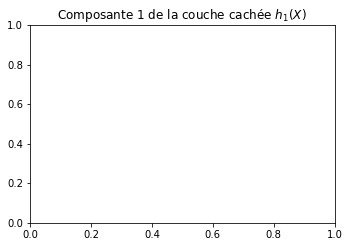

In [40]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def H1(x1,x2):
    return sigmoid(algo.intercepts_[0][0]+algo.coefs_[0][0][0]*x1+algo.coefs_[0][1][0]*x2)
def H2(x1,x2):
    return sigmoid(algo.intercepts_[0][1]+algo.coefs_[0][0][1]*x1+algo.coefs_[0][1][1]*x2)
def R(h1,h2):
    return sigmoid(algo.intercepts_[1][0]+algo.coefs_[1][0][0]*h1+algo.coefs_[1][1][0]*h2)
def XtoR(x1,x2):
    return R(H1(x1,x2),H2(x1,x2)) 
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title("Composante 1 de la couche cachée $h_1(X)$")
courbes_de_niveaux(H1,0,0,1,1)
plt.subplot(2,2,2)
plt.title("Composante 2 de la couche cachée $h_2(X)$")
courbes_de_niveaux(H2,0,0,1,1)
plt.subplot(2,2,3)
plt.title("Sortie de la couche cachée")
courbes_de_niveaux(R,0,0,1,1)
plt.subplot(2,2,4)
plt.title("de X à la sortie")
courbes_de_niveaux(XtoR,0,0,1,1)

Autres tentatives :

In [24]:
B1=[ 1,-1]
B2=[1]
V1=[[-10,10],[-10,10]]
V2=[[-20],[20]]
for i in range(n):
    print('[',X.iloc[i][0],',',X.iloc[i][1],']','->',sigmoid(B2[0]\
                                                             +V2[0][0]*sigmoid(B1[0]+V1[0][0]*X.iloc[i][0]+V1[0][1]*X.iloc[i][1])\
                                                             +V2[1][0]*sigmoid(B1[1]+V1[1][0]*X.iloc[i][0]+V1[1][1]*X.iloc[i][1]))\
          ,'...on aimerait :',Y.iloc[i])

[ 1 , 1 ] -> 0.0002631973630932956 ...on aimerait : 0
[ 0 , 0 ] -> 0.0002631973630932956 ...on aimerait : 0
[ 0 , 1 ] -> 0.7306388288867955 ...on aimerait : 1
[ 1 , 0 ] -> 0.730638828886796 ...on aimerait : 1


Représentation graphique

<function matplotlib.pyplot.show(*args, **kw)>

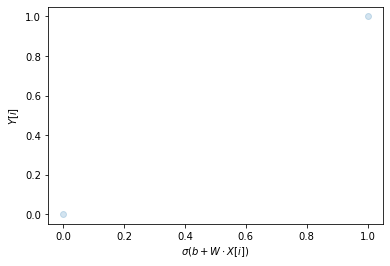

In [25]:
plt.scatter([algo.predict([X.iloc[i]])[0]+0*np.random.randn(1)/10 for i in range(n)]\
            ,[Y.iloc[i]+0*np.random.randn(1)/10 for i in range(n)]\
            ,alpha=0.1)
plt.xlabel('$\sigma(b+W\cdot X[i])$')
plt.ylabel('$Y[i]$')
plt.show

In [26]:
maskv1=[Y.iloc[i]==1 for i in range(n)]
maskv0=[Y.iloc[i]==0 for i in range(n)]

# Prédictions
maskp1=[algo.predict([X.iloc[i]])[0]>0.5 for i in range(n)]
maskp0=[algo.predict([X.iloc[i]])[0]<=0.5 for i in range(n)]

# Erreurs
# Y=1 mais sigma(b+XW)<0.5 (Faux négatifs)
maske1=[(maskv1[i]==True and maskp1[i]==False) for i in range(len(maskv1))]
# Y=0 mais sigma(b+XW)>0.5 (Faux positifs)
maske0=[(maskv0[i]==True and maskp0[i]==False) for i in range(len(maskv0))]
# Y=1 et sigma(b+XW)>0.5 (Vrais positifs)
maskok1=[(maskv1[i]==True and maskp1[i]==True) for i in range(len(maskv1))]
# Y=0 et sigma(b+XW)<0.5 (Vrais négatifs)
maskok0=[(maskv0[i]==True and maskp0[i]==True) for i in range(len(maskv0))]
print("Erreur moyenne :",(np.count_nonzero(maske0)+np.count_nonzero(maske1))/n\
     ,'(score : ',1-(np.count_nonzero(maske0)+np.count_nonzero(maske1))/n,')'\
     ,'\n Vrai positifs :',np.count_nonzero(maskok1)
     ,'\n Faux positifs :',np.count_nonzero(maske0)\
     ,'\n Vrai négatifs :',np.count_nonzero(maskok0)\
     ,'\n Faux négatifs :',np.count_nonzero(maske1))

Erreur moyenne : 0.0 (score :  1.0 ) 
 Vrai positifs : 2 
 Faux positifs : 0 
 Vrai négatifs : 2 
 Faux négatifs : 0
